In [3]:
import pandas as pd

In [4]:
data =pd.read_csv("/Users/srigurubalaji/Desktop/P4/Cleaneddata.csv")

In [5]:
data

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7,6,10,2,...,3421,881,289573,117668,3586,5,66,31,6,3
1,1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58,43,7,1,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,2,1056561957389,809,58352,712507,2024-06-13 04:52:55+00:00,423,298,10,1,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,3,1279900258736,92,32992,774301,2024-06-10 16:39:36+00:00,2,2,1,0,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4,4,214748368522,148,4359,188041,2024-06-15 01:08:07+00:00,9,74,6,2,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922800,9516832,1056561956622,0,90,496631,2024-06-08 15:26:08+00:00,7,6,10,2,...,3421,881,289573,117668,3586,5,66,242,1445,10630
8922801,9516833,1228360650033,59,196410,748366,2024-06-06 09:40:08+00:00,2,2,1,0,...,3421,881,289573,117668,3586,5,66,242,1445,10630
8922802,9516834,867583395122,44,14117,7425,2024-06-11 22:51:03+00:00,78,57,7,0,...,3421,881,289573,117668,3586,5,66,242,1445,10630
8922803,9516835,395136991850,43,644,8973,2024-05-20 23:01:01+00:00,52,10,9,0,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [6]:
import sklearn

In [25]:
x = data.drop(["IncidentGrade","Timestamp","Unnamed: 0"],axis=1)
y = data['IncidentGrade']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
lr.score(x_test,y_test)

0.26757998209956646

In [12]:
lr.coef_#impact of each feature on predicting the output.

array([ 1.55929235e-09, -3.12653467e-14, -1.26119026e-04, -1.13203248e-06,
        1.91106170e-07, -1.05644549e-04, -3.67372436e-06,  2.13626826e-02,
       -1.95454344e-02,  4.04510533e-01,  9.05166092e-07,  1.25926427e-06,
        1.22084508e-06,  1.56303987e-06, -8.82204627e-07,  4.30961673e-07,
       -1.21466972e-06,  9.07138476e-08,  1.14180055e-06,  1.49165837e-07,
       -4.09560677e-05,  4.60658431e-04,  1.74002756e-04, -2.12956206e-04,
        1.64797954e-04, -4.58006916e-04,  1.51724080e-06,  1.95516466e-08,
        1.91344780e-04, -5.19938986e-02,  2.85022576e-03, -3.41074225e-03,
        6.34840370e-04, -8.98990626e-05])

In [13]:
lr.intercept_

np.float64(0.1294195048835205)

In [14]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(multi_class = 'multinomial')

In [24]:
logr.fit(x_train,y_train)

/Users/srigurubalaji/Desktop/P4/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
logr.score(x_test,y_test)

0.4738806911055436

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 3)#number of decision trees that you wanna create

In [28]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [29]:
rfc.score(x_test,y_test)

0.9624837705183515

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

In [30]:
y_predict = rfc.predict(x_test)

In [32]:
cm = confusion_matrix(y_test,y_predict)

In [38]:
cmdf = pd.DataFrame(cm)

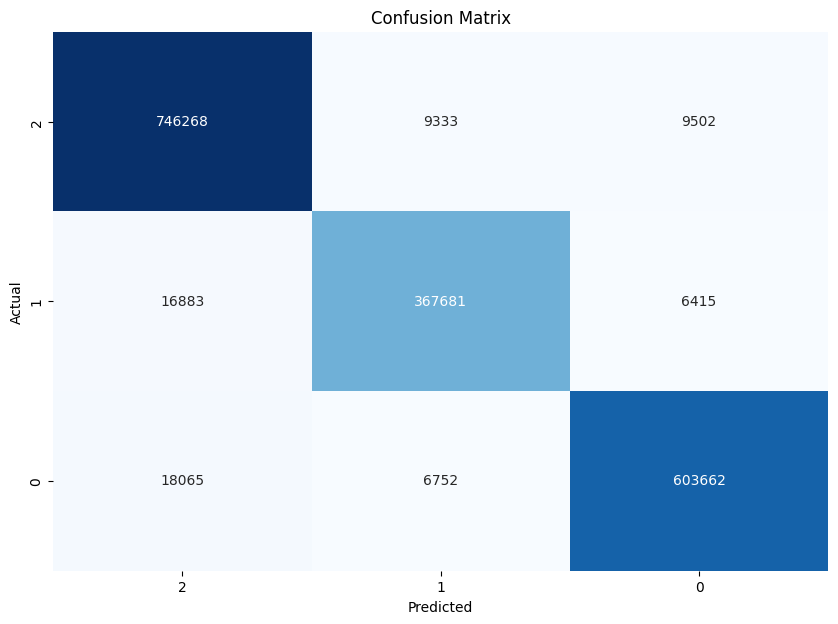

In [39]:
plt.figure(figsize=(10, 7))
sns.heatmap(cmdf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

chi squared

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_predict, average=None)
recall = recall_score(y_test, y_predict, average=None)
f1 = f1_score(y_test, y_predict, average=None)

In [44]:
print(precision)
print(recall)
print(f1)

[0.95526461 0.95808644 0.97430997]
[0.9753824  0.94041112 0.9605126 ]
[0.96521869 0.9491665  0.96736209]


In [ ]:
x = data[['Category','EntityType','EvidenceRole']]
y = data['IncidentGrade']

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
err = chi2(x,y)

In [ ]:
err

(array([573683.43438366, 740847.09106033, 123308.37736929]),
 array([0., 0., 0.]))

In [ ]:
arr = pd.Series(err[0],index = x.columns)
arr.sort_values(ascending=False,inplace= True)

In [ ]:
arr

EntityType      740847.091060
Category        573683.434384
EvidenceRole    123308.377369
dtype: float64

<Axes: >

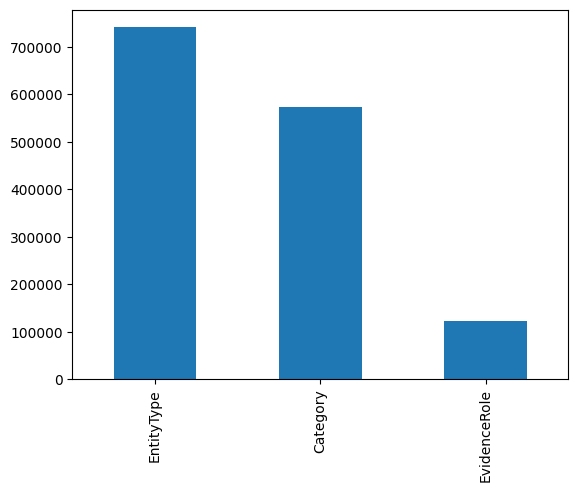

In [ ]:
arr.plot.bar()

anova test

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8922805 entries, 0 to 8922804
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Id                  int64 
 2   OrgId               int64 
 3   IncidentId          int64 
 4   AlertId             int64 
 5   Timestamp           object
 6   DetectorId          int64 
 7   AlertTitle          int64 
 8   Category            int64 
 9   IncidentGrade       int64 
 10  EntityType          int64 
 11  EvidenceRole        int64 
 12  DeviceId            int64 
 13  Sha256              int64 
 14  IpAddress           int64 
 15  Url                 int64 
 16  AccountSid          int64 
 17  AccountUpn          int64 
 18  AccountObjectId     int64 
 19  AccountName         int64 
 20  DeviceName          int64 
 21  NetworkMessageId    int64 
 22  RegistryKey         int64 
 23  RegistryValueName   int64 
 24  RegistryValueData   int64 
 25  ApplicationId     

In [ ]:
anovax = data.drop(columns = ['Category','Unnamed: 0','IncidentGrade','EntityType','EvidenceRole','Timestamp'])
anovay = data['IncidentGrade']

In [ ]:
anovax

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,7,6,98799,138268,27,160396,...,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,58,43,98799,138268,360606,160396,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,423,298,98799,138268,360606,68652,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2,2,98799,138268,360606,13,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,9,74,98799,138268,360606,160396,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922800,1056561956622,0,90,496631,7,6,98799,138268,360606,160396,...,3421,881,289573,117668,3586,5,66,242,1445,10630
8922801,1228360650033,59,196410,748366,2,2,98799,138268,360606,164,...,3421,881,289573,117668,3586,5,66,242,1445,10630
8922802,867583395122,44,14117,7425,78,57,98799,138268,360606,160396,...,3421,881,289573,117668,3586,5,66,242,1445,10630
8922803,395136991850,43,644,8973,52,10,98799,138268,465,160396,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif

In [ ]:
selector = SelectKBest(score_func = f_classif,k=15)
acr = selector.fit_transform(anovax,anovay)
selfea = anovax.columns[selector.get_support()]

In [ ]:
j = selfea.to_list()

In [ ]:
j.extend(['Category','EntityType'])

In [ ]:
logical = data[j]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(logical,anovay,test_size=0.3,random_state=42)


In [ ]:
lr.fit(x_train,y_train)

/Users/srigurubalaji/Desktop/P4/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ypredict = lr.predict(x_test)

In [ ]:
score = accuracy_score(y_test,ypredict)


In [ ]:
score 

0.5354806148439094

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()


In [ ]:
datats = data.drop(["Timestamp"],axis=1)

In [ ]:
dattats = mms.fit_transform(datats)

In [ ]:
data1 = pd.DataFrame(dattats)

In [ ]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000e+00,0.105528,0.000000,0.001021,0.071595,0.000735,0.000053,0.526316,1.0,0.46875,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.128099,0.004152,0.000282
1,1.050769e-07,0.266332,0.014323,0.000544,0.122010,0.006091,0.000380,0.368421,0.5,1.00000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
2,2.101539e-07,0.618090,0.131673,0.097301,0.413898,0.044423,0.002633,0.526316,0.5,0.96875,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
3,3.152308e-07,0.748744,0.014974,0.055014,0.449794,0.000210,0.000018,0.052632,0.0,0.96875,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
4,4.203078e-07,0.125628,0.024089,0.007269,0.109234,0.000945,0.000654,0.315789,1.0,1.00000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000


In [ ]:
data1x = data.drop(columns = ['Category','Unnamed: 0','IncidentGrade','EntityType','EvidenceRole','Timestamp'])
data2y = data['IncidentGrade']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data1x,data2y,test_size=0.3,random_state=42)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr.score(x_test,y_test)

0.4729094955921941

In [ ]:
logr.fit(x_train,y_train)

/Users/srigurubalaji/Desktop/P4/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [ ]:
logr.score(x_test,y_test)

0.4729094955921941

: 